In [1]:
import numpy as np
import pandas as pd

In [2]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"])
}

In [3]:
d

{'one': a    1.0
 b    2.0
 c    3.0
 dtype: float64,
 'two': a    1.0
 b    2.0
 c    3.0
 d    4.0
 dtype: float64}

In [4]:
df = pd.DataFrame(d)

In [5]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [6]:
pd.DataFrame(df, index=["d", "b", "a"])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [7]:
pd.DataFrame(df, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [8]:
data = np.zeros((2, ), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])

In [9]:
data

array([(0, 0., b''), (0, 0., b'')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [10]:
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]

In [11]:
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [12]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [13]:
pd.DataFrame(data, index=["first", "second"])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [14]:
pd.DataFrame(data, columns=["C", "A", "B"])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


In [15]:
data2 = [{"a": 1, "b": 2},
         {"a": 5, "b": 10, "c": 20}]

In [16]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [17]:
pd.DataFrame(data2, index=["first", "second"])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [18]:
pd.DataFrame(data2, columns=["a", "b"])

,a,b
0,1,2
1,5,10


In [19]:
pd.DataFrame(
    {
        ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
        ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
        ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
        ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
    }
)

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

# Column selection, addition, deletion

In [20]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [21]:
df["one"]

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [22]:
df["three"] = df["one"] * df["two"]

In [23]:
df["flag"] = df["one"] > 2

In [24]:
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [25]:
del df["two"]

In [26]:
df

,one,three,flag
a,1.0,1.0,False
b,2.0,4.0,False
c,3.0,9.0,True
d,NaN,NaN,False


In [27]:
three = df.pop("three")

In [28]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [29]:
three

a    1.0
b    4.0
c    9.0
d    NaN
Name: three, dtype: float64

In [30]:
df["foo"] = "bar"

In [31]:
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


In [32]:
df["one"][:2]

a    1.0
b    2.0
Name: one, dtype: float64

In [33]:
df["one_trunc"] = df["one"][:2]

In [34]:
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


In [35]:
df.insert(1, "bar", df["one"])

In [36]:
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


# Assign

In [37]:
iris = pd.read_csv("./../../Data/iris.csv")

In [38]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
iris.assign(sepal_ratio=iris["SepalWidthCm"] / iris["SepalLengthCm"]).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_ratio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [40]:
iris.assign(sepal_ratio=lambda x: (x["SepalWidthCm"] / x["SepalLengthCm"])).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_ratio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [41]:
iris.query("SepalLengthCm > 5")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
10,11,5.4,3.7,1.5,0.2,Iris-setosa
14,15,5.8,4.0,1.2,0.2,Iris-setosa
15,16,5.7,4.4,1.5,0.4,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: xlabel='SepalRatio', ylabel='PetalRatio'>

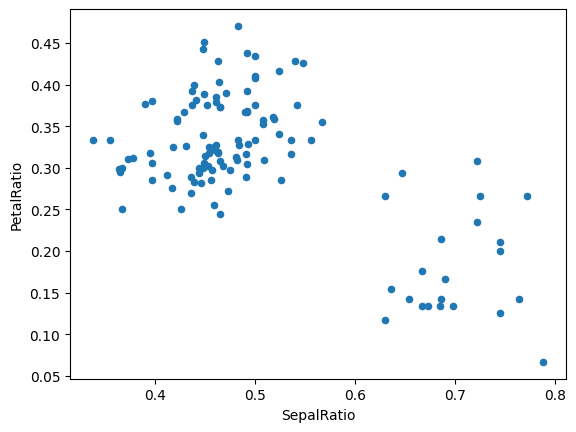

In [42]:
(
    iris.query("SepalLengthCm > 5")
    .assign(
        SepalRatio=lambda x: x.SepalWidthCm / x.SepalLengthCm,
        PetalRatio=lambda x: x.PetalWidthCm / x.PetalLengthCm
    )
    .plot(kind="scatter", x="SepalRatio", y="PetalRatio")
)

In [43]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})

In [44]:
dfa

,A,B
0,1,4
1,2,5
2,3,6


In [45]:
dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In [46]:
def test(a):
    print(a)
    print(type(a))
    return a["B"]+1

In [47]:
dfa.assign(C=test)

   A  B
0  1  4
1  2  5
2  3  6
<class 'pandas.core.frame.DataFrame'>


,A,B,C
0,1,4,5
1,2,5,6
2,3,6,7


# Indexing / selection

In [48]:
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


In [49]:
df.loc["b"]

one            2.0
bar            2.0
flag         False
foo            bar
one_trunc      2.0
Name: b, dtype: object

In [50]:
df.iloc[0]

one            1.0
bar            1.0
flag         False
foo            bar
one_trunc      1.0
Name: a, dtype: object

In [51]:
df["one"]

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [53]:
df[:3]

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN


In [55]:
df[[True, False, False, True]]

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
d,NaN,NaN,False,bar,NaN


# Data alignment and arithmetic

In [1]:
import pandas as pd
import numpy as np

In [3]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)
df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)

In [4]:
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [5]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [6]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [7]:
-df1

,a,b
0,False,True
1,True,False
2,False,False
